# Лабораторная работа №5.  Цифровой спектральный анализ.

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот,
        соотвествующих вычисленным значениям
        спектральной функции
    complex
        значения спектральной функции
    """
    return (
        np.fft.fftshift(np.fft.fftfreq(M, d=1)),
        np.fft.fftshift(np.fft.fft(x, M)),
    )

In [2]:
%matplotlib inline

In [3]:
%matplotlib ipympl

# Модуль 1. Окна в спектральном анализе методом ДПФ, алгоритмы вычисления ДПФ.

## Задача 1.1. Окна в спектральном анализе

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное |
| $w_2[k]$ | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга |
| $w_3[k]$ | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop |
| $n_0$ | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  |



Постройте графики для трех окон длины $N=64$ из таблицы во временной  области ($w_i[k]$, $i=1, 2,3$) и в частотной  области (ДВПФ в линейном масштабе и в дБ). 
Для каждого из окон графически определите следующие параметры.
* Ширину $\Delta \nu$ главного лепестка на нулевом уровне.
* Ширину $\Delta \nu$  главного лепестка на уровне -3дБ от максимума модуля ДВПФ.
* Ширину $\Delta \nu$  главного лепестка на уровне -6дБ от максимума модуля ДВПФ.
* Максимальный уровень боковых лепестков в дБ относительно главного. 

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{64} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{64} k\right)$$
 со взвешиванием этими оконными функциями. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков на результат спектрального анализа? 


## Задача 1.2. Алгоритмы вычисления ДПФ.
| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |

1) Используя данные из файла, сформировать последовательность $x[k]$ длиной 2048 отсчетов (например, по отсчетам сигнала из середины записи). 

2) Вычислить 2048-точечное ДПФ для $x[k]$, используя 
* а) матричную форму ДПФ, 
* б) быстрое преобразование Фурье. 

Сравнить результаты. 

3) Написать программу вычисления одного отсчета ДПФ по алгоритму Герцеля. Сравнить результаты вычислений с БПФ для любых трех значений $n$. 

---

**Алгоритм Герцеля**

1. Для $m=0,\,1,\, \dots,\, N-1$ определяем 

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2. Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$

---



# Модуль 2. Кратковременное дискретное преобразование Фурье

## Задача 2.1. Кратковременное ДПФ (STFT)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |


Вычислите с помощью Python кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле из таблицы. Изобразите спектрограмму сигнала. Длину окна $M$, тип оконной функции, число точек в перекрытии $L$, масштабы осей и размерность ДПФ $N_\text{FFT}$ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равны длина окна и размер перекрытия в секундах? Как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте для данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,
* б) длина окна $M$,
* в) размерность ДПФ $N_\text{FFT}$ за счет дополнения нулевыми отсчетами?










#  Модуль 3. Периодограммные методы оценки СПМ

## Задача 3.1. Интерполяция периодограммы дополнением нулевых отсчетов (Zero Padding)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy|

По представленным в файле отсчетам сигнала построить периодограмму, для которой размерность ДПФ совпадает с длительность сигнала. Сравнить ее с периодограммой, для которой размерность ДПФ в 8 раз больше. Частота дискретизации  $f_s=16$ кГц. Ответить на вопросы.

1) Какое разрешение по частоте, обусловленное сеткой частот ДПФ, у периодограммы в первом и во втором случае?

2) Как частота наблюдаемой гармонической компоненты соотносится с сеткой частот ДПФ в первом и во втором случае? 

3) Почему расчет периодограммы достаточно провести для интервала частот $f \in [0; 0,5f_s]$?

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x[k]$  (`x`). 

In [4]:
x = np.load("data/variant_2_ex_2_1.npy")
fs = 16_000

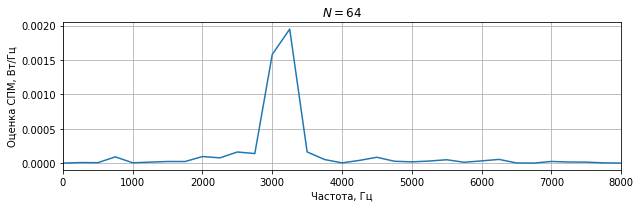

In [10]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(
    x, fs=fs, nfft=x.shape[0], scaling="density"
)
plt.plot(f, Pxx_den / 2)
plt.xlim([0, fs / 2])
plt.grid()
plt.title("$N = %i$" % len(x))
plt.xlabel("Частота, Гц")
plt.ylabel("Оценка СПМ, Bт/Гц")
plt.tight_layout()
# plt.savefig('psd_1.svg')
plt.show()

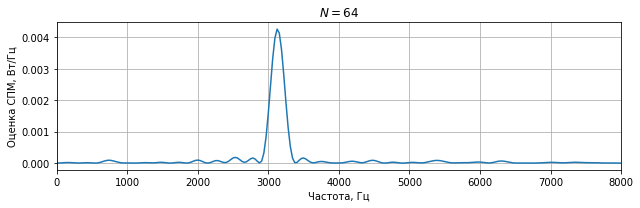

In [11]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(
    x, fs=fs, nfft=x.shape[0] * 8, scaling="density"
)
plt.plot(f, Pxx_den / 2)
plt.xlim([0, fs / 2])
plt.grid()
plt.title("$N = %i$" % len(x))
plt.xlabel("Частота, Гц")
plt.ylabel("Оценка СПМ, Bт/Гц")
plt.tight_layout()
# plt.savefig('psd_1.svg')
plt.show()

## Задача 3.2. Выделение синусоиды на фоне шума
Постройте периодограмму для оценки СПМ процесса, по выборкам, которые могут быть описаны формулой

$$x[k]=a_1 \sin(2\pi k f_0 /f_s) + \varepsilon[k], \;\; k=0, 1, \dots, N-1,$$

где $N=64$, $\varepsilon[k]$ — дискретный белый гауссовский шум c нулевым средним и с дисперсией $\sigma^2=400$ (`scale=20`), $a_1=5$, частота дискретизации  $f_s=16$ кГц, $f_0=2$ кГц.

Определите, возможно ли выделение гармонической компоненты в периодограмме на фоне шума (при $N=64$)? Вычислите такую длину записи (реализации), чтобы математическое ожидание оценки СПМ для чистого сигнала на частоте $f_0$ превосходило в 40 раз  математическое ожидание оценки СПМ шума. Постройте периодограмму для такого случая.

A^2 N / 4 =  400.0
sigma^2 =  400


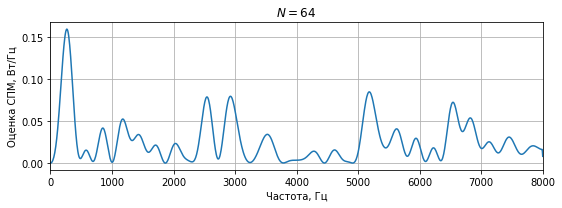

In [12]:
N = 64
k = np.arange(N)
A = 5
fs = 16_000
f1 = 2_000
x = A * np.sin(2 * np.pi * k * f1 / fs) + np.random.normal(scale=20, size=N)

print("A^2 N / 4 = ", A**2 * N / 4)
print("sigma^2 = ", 400)

f, Pxx_den = signal.periodogram(
    x, fs=fs, window="boxcar", nfft=2**11, scaling="density"
)
plt.figure(figsize=[8, 3])
plt.grid()
plt.title("$N = %i$" % len(x))
plt.plot(f, Pxx_den / 2, "-")
plt.xlabel("Частота, Гц")
plt.ylabel("Оценка СПМ, Bт/Гц")
plt.xlim([0, fs / 2])
plt.tight_layout()
# plt.savefig('psd_3.svg')
plt.show()

A^2 N / 4 =  409600.0
sigma^2 =  400


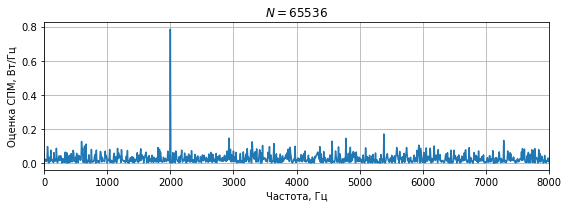

In [18]:
N = 2**16
k = np.arange(N)
A = 5
fs = 16_000
f1 = 2_000
x = A * np.sin(2 * np.pi * k * f1 / fs) + np.random.normal(scale=20, size=N)

print("A^2 N / 4 = ", A**2 * N / 4)
print("sigma^2 = ", 400)

f, Pxx_den = signal.periodogram(
    x, fs=fs, window="boxcar", nfft=2**11, scaling="density"
)
plt.figure(figsize=[8, 3])
plt.grid()
plt.title("$N = %i$" % len(x))
plt.plot(f, Pxx_den / 2, "-")
plt.xlabel("Частота, Гц")
plt.ylabel("Оценка СПМ, Bт/Гц")
plt.xlim([0, fs / 2])
plt.tight_layout()
# plt.savefig('psd_3.svg')
plt.show()

#  Модуль 4. Методы оценки СПМ (продолжение)

## Задача 4.1. Методы Уэлча и  Блэкмана-Тьюки

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy|

По отсчетам из файла (см. таблицу) постройте оценку СПМ по методам:
* периодограмм,
* Блэкмана-Тьюки,
* модифицированных периодограмм Уэлча.

Сделайте выводы о составе процесса. Выбор параметров оценок СПМ осуществите самостоятельно. Частота дискретизации $f_s=16$ кГц. Сравните результаты. 

Оцените частоту $f_1$, если известно, что случайный процесс, СПМ которого оценивается по этим выборкам, имеет вид 
$$x(t)=a_1 \sin(2\pi f_1 t) + \varepsilon(t),$$
где $\varepsilon(t)$ — белый шум с нулевым математическим ожиданием.


In [16]:
x = np.load("data/variant_2_ex_3_1.npy")
fs = 16_000
N1 = int(np.ceil(len(x) / 10))
N1

410

In [17]:
def auto_correlation(x, N1, mode="biased"):
    Rx = signal.correlate(x, x) / len(x)
    lag = np.arange(-(len(x) - 1), len(x))
    return Rx[np.logical_and(lag <= N1 - 1, lag >= 0)]

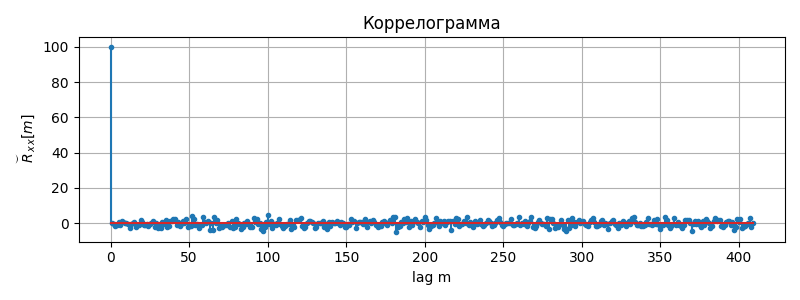

In [26]:
Rx = auto_correlation(x, N1, mode="biased")
plt.figure(figsize=[8, 3])
plt.tight_layout()
plt.stem(np.arange(len(Rx)), Rx, linefmt="", markerfmt=".")
plt.title("Коррелограмма")
plt.xlabel("lag m")
plt.ylabel("${{\\overset{\\smile}{R}}_{x}}_x[m]$")
plt.grid()
# plt.xlim([3000, 3050])
# plt.ylim([0, 0.1])
plt.tight_layout()
plt.show()

In [19]:
def blackman_tukey_estimator(
    x, window="bartlett", Nfft=None, auto_correlation_mode="biased", fs=1
):
    N = len(x)
    N1 = int(np.ceil(N / 10))
    if Nfft is None:
        Nfft = max(2**12, N)
    window = signal.get_window(window, 2 * N1 - 1, fftbins=False)
    Rx = (
        auto_correlation(x, N1, mode=auto_correlation_mode)
        * window[N1 - 1 : 2 * N1 : 1]
    )
    return (
        fs * np.arange(Nfft) / Nfft,
        (2 * np.fft.fft(Rx, Nfft).real - Rx[0]) / fs,
    )

In [31]:
f, P_BT = blackman_tukey_estimator(x, window='bartlett', fs=fs)

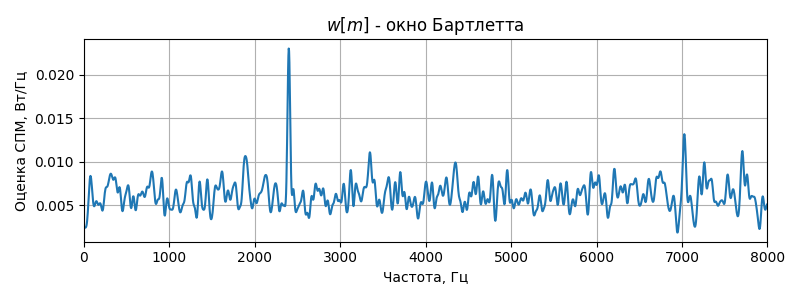

In [32]:
plt.figure(figsize=[8, 3])
#plt.stem(f, P_BT, 'b', 'b.')
plt.plot(f, P_BT)
plt.xlim([0, fs/2])
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.title('$w[m]$ - окно Бартлетта')
plt.grid()
plt.tight_layout()
#plt.savefig('psd_BT2.svg')
plt.show()

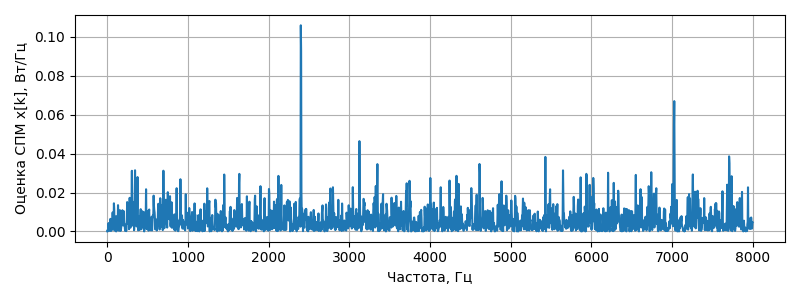

In [33]:
f, Pxy = signal.csd(x, x, fs, nperseg=x.size)
plt.figure(figsize=[8, 3])
# plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ x[k], Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

## Задача 4.2*. Метод Блэкмана-Тьюки для несмещенной оценки АКФ

Модифицируйте функции `auto_correlation` и `blackman_tukey_estimator` так, чтобы их можно было использовать и с несмещенной оценкой АКФ (со значениями соответствующих параметров `unbiased`). Постойте оценку СПМ по методу Блэкмана-Тьюки с несмещенной оценкой АКФ для данных из задачи 4.1. Выбор окна и размерность ДПФ осуществить самостоятельно. Сравните результат с задачей 4.1. 

In [76]:
def auto_correlation(x, N1, mode="biased"):
    match mode:
        case "biased":
            Rx = signal.correlate(x, x) / len(x)
            lag = np.arange(-(len(x) - 1), len(x))
            return Rx[np.logical_and(lag <= N1 - 1, lag >= 0)]
        case "unbiased":
            lag = np.arange(-(len(x) - 1), len(x))
            Rx = signal.correlate(x, x) / (len(x) - np.abs(lag))
            return Rx[np.logical_and(lag <= N1 - 1, lag >= 0)]

        case _:
            assert False, f"Unsupported mode: {mode}"


def blackman_tukey_estimator(
    x, window="bartlett", Nfft=None, auto_correlation_mode="biased", fs=1
):
    N = len(x)
    N1 = int(np.ceil(N / 10))
    if Nfft is None:
        Nfft = max(2**12, N)
    window = signal.get_window(window, 2 * N1 - 1, fftbins=False)
    Rx = (
        auto_correlation(x, N1, mode=auto_correlation_mode)
        * window[N1 - 1 : 2 * N1 : 1]
    )
    return (
        fs * np.arange(Nfft) / Nfft,
        (2 * np.fft.fft(Rx, Nfft).real - Rx[0]) / fs,
    )

In [77]:
f, P_BT = blackman_tukey_estimator(
    x, window="bartlett", fs=fs, auto_correlation_mode="unbiased"
)
f1, P_BT1 = blackman_tukey_estimator(
    x, window="bartlett", fs=fs, auto_correlation_mode="biased"
)

np.max(np.abs(P_BT - P_BT1))

0.000604421440499301

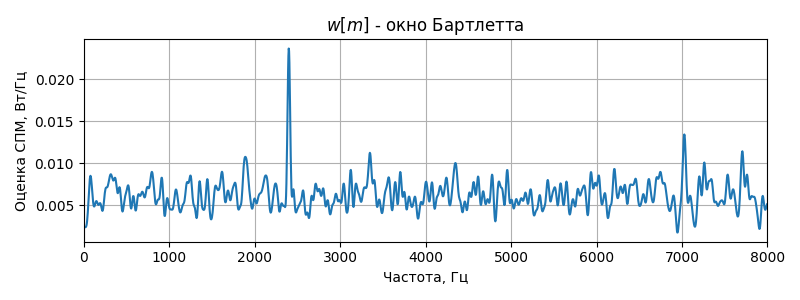

In [78]:
plt.figure(figsize=[8, 3])
# plt.stem(f, P_BT, 'b', 'b.')
plt.plot(f, P_BT)
plt.xlim([0, fs / 2])
plt.xlabel("Частота, Гц")
plt.ylabel("Оценка СПМ, Bт/Гц")
plt.title("$w[m]$ - окно Бартлетта")
plt.grid()
plt.tight_layout()
# plt.savefig('psd_BT2.svg')
plt.show()

## Задача 4.3*. Оценка кросс-спектральной плотности мощности 

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy|

Для данных из файла (см. таблицу) об отсчетах сигналов из ансамбля реализаций случайных процессов $x(t)$ и $y(t)$ построить с помощью метода Уэлча
* оценку СПМ процесса $x(t)$,
* оценку СПМ процесса $y(t)$,
* модуль оценки взаимной СПМ процессов  $x(t)$ и $y(t)$.

Параметры оценок определить самостоятельно. Сделать выводы. 

In [80]:
x, y = np.load("data/variant_2_ex_3_3.npy")

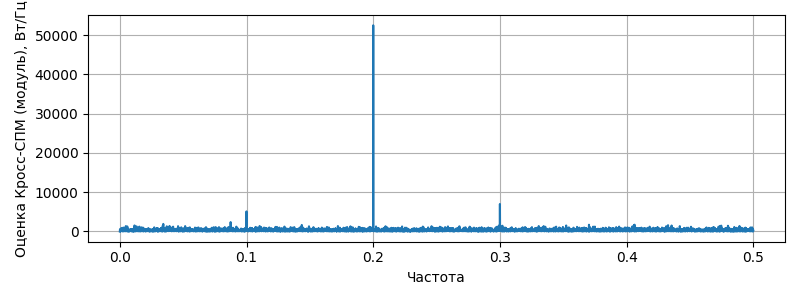

In [83]:
f, Pxy = signal.csd(x, y, nperseg=x.size)
plt.figure(figsize=[8, 3])
# plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота')
plt.ylabel('Оценка Кросс-СПМ (модуль), Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

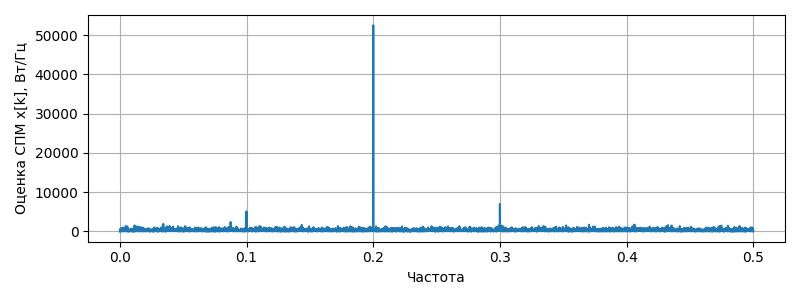

In [90]:
f, Pxy = signal.csd(x, y, nperseg=x.size)
plt.figure(figsize=[8, 3])
#plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота')
plt.ylabel('Оценка СПМ x[k], Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

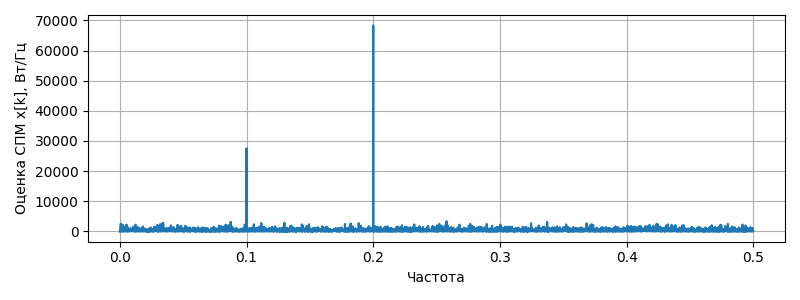

In [89]:
f, Pxy = signal.csd(x, x, nperseg=x.size)
plt.figure(figsize=[8, 3])
#plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота')
plt.ylabel('Оценка СПМ x[k], Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

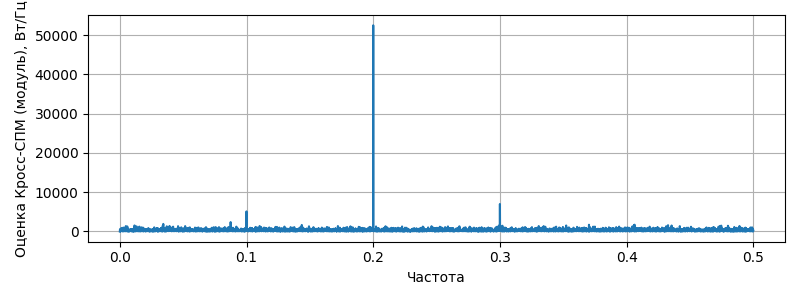

In [86]:
f, Pxy = signal.csd(y, x, nperseg=x.size)
plt.figure(figsize=[8, 3])
# plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота')
plt.ylabel('Оценка Кросс-СПМ (модуль), Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

## Задача 4.4. Периодограмма Ломба-Скаргла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy|

Постройте периодограмму Ломба-Скаргла для данных, представленных в файле, который соответствует номеру Вашего варианта.
Известно, что исходный сигнал до взятия отсчетов с неравномерным шагом имеел форму
$$x(t)=a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t)+  \varepsilon(t),$$
где $\varepsilon(t)$ — реализация белого шума с нулевым математическим ожиданием и дисперсией $\sigma^2>0$, причем частоты $ f_1$, $ f_2 $ представлены целым числом килогерц и не превосходят 8 кГц. Оцените частоты $ f_1$ и $ f_2 $, используя периодограмму Ломба-Скаргла.

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x(t_i)$  (`x`) в моменты времени $t_i$ (`t`). 

In [100]:
x, t = np.load("data/variant_2_ex_3_4.npy")
fs = 20_000

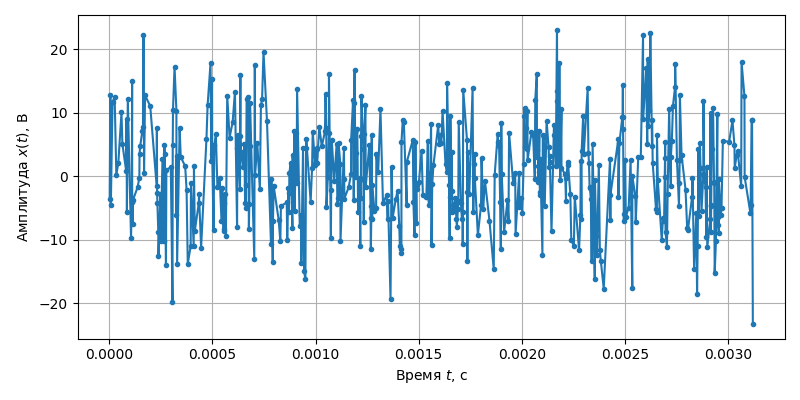

In [101]:
plt.figure(figsize=[8, 4])
plt.plot(t, x, ".-")
plt.xlabel("Время $t$, с")
plt.ylabel("Амплитуда $x(t)$, В")
plt.tight_layout()
plt.grid()
plt.show()

In [102]:
w=np.linspace(fs/2**14, fs/2, 2**12)*2*np.pi
pgram = signal.lombscargle(t, x, w, normalize=True)

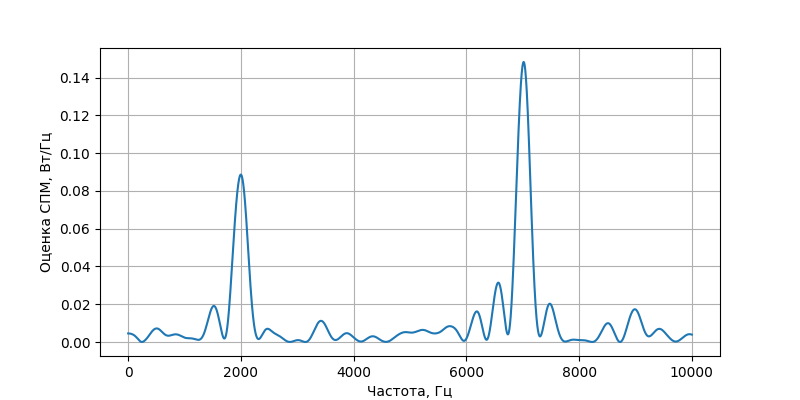

In [103]:
plt.figure(figsize=[8, 4])
plt.plot(w / (2 * np.pi), pgram)
plt.xlabel("Частота, Гц")
plt.ylabel("Оценка СПМ, Bт/Гц")
plt.grid()
plt.show()